In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate

In [2]:
train=pd.read_csv('UNSW_NB15_Testing.csv')


In [3]:
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [4]:
train.dtypes

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

In [5]:
train.describe(include='object')

,proto,service,state,attack_cat
count,82332,82332,82332,82332
unique,131,13,7,10
top,tcp,-,FIN,Normal
freq,43095,47153,39339,37000


In [6]:
train["attack_cat"].unique()

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

In [7]:
train["attack_cat"].value_counts()

Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64

<Axes: xlabel='attack_cat', ylabel='count'>

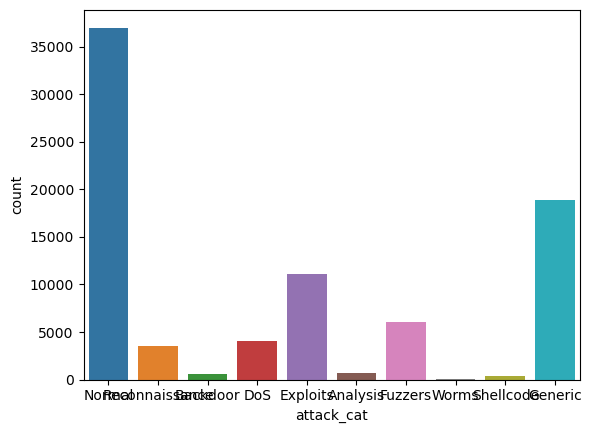

In [8]:
sns.countplot(x=train['attack_cat'])

In [9]:
train["proto"].value_counts()

tcp           43095
udp           29418
unas           3515
arp             987
ospf            676
              ...  
br-sat-mon       32
pvp              32
wsn              32
ib               31
igmp             30
Name: proto, Length: 131, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
label_encoder=LabelEncoder()

In [12]:
train["attack_cat"]=label_encoder.fit_transform(train["attack_cat"])

In [13]:
train["proto"]=label_encoder.fit_transform(train["proto"])

In [14]:
train["service"]=label_encoder.fit_transform(train["service"])

In [15]:
train["state"]=label_encoder.fit_transform(train["state"])

In [16]:
print(label_encoder)

LabelEncoder()


In [21]:
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,117,0,4,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,6,0
1,2,0.000008,117,0,4,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,6,0
2,3,0.000005,117,0,4,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,6,0
3,4,0.000006,117,0,4,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,6,0
4,5,0.000010,117,0,4,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,6,0


In [22]:
X_train = train.drop(['proto'], axis=1)
Y_train = train['proto']


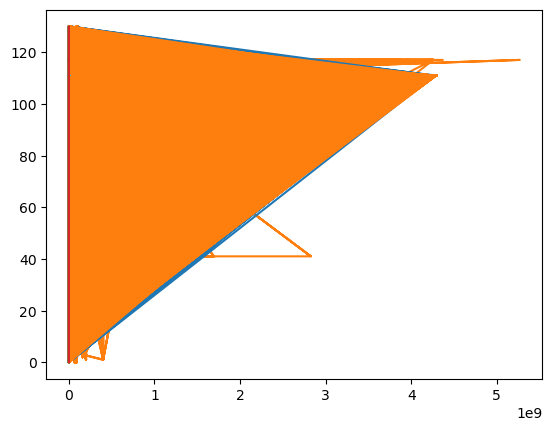

In [23]:
import matplotlib.pyplot as plt
plt.plot(X_train, Y_train)
plt.show()

In [24]:
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_train, Y_train)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['id',
 'dur',
 'spkts',
 'sbytes',
 'sloss',
 'swin',
 'stcpb',
 'dtcpb',
 'smean',
 'attack_cat']

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import lightgbm as lgb
import warnings
from xgboost import XGBClassifier
import time
from sklearn.metrics import f1_score

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.50, random_state=42)
warnings.filterwarnings("ignore")
# Create and train LightGBM model
model = lgb.LGBMClassifier()
model.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(x_test)
# Evaluate model performance
accuracy1 = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
#f1=f1_score(y_pred, y_test)
print("==> Accuracy of LightGBM : %.2f%% <==" % (accuracy1 * 100.0))
#print("==> Time:"," %s seconds <==" % (time.time() - start_time))
#print("==>F1_score=",f1,"<==")

models = []
models.append(('XGB', XGBClassifier(eta=0.1, gamma=5)))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    start_time = time.time()
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    predictions = [value for value in y_pred]
    #f=f1_score(y_pred, y_test)
    # evaluate predictions
    accuracy2 = accuracy_score(y_test, predictions)
    print("==> Accuracy of XGB : %.2f%% <==" % (accuracy2 * 100.0))
   # print("==> Time:"," %s seconds <==" % (time.time() - start_time))
    #print("==>F1_score=",f,"<==")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003707 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5967
[LightGBM] [Info] Number of data points in the train set: 41166, number of used features: 44
[LightGBM] [Info] Start training from score -7.792155
[LightGBM] [Info] Start training from score -8.140461
[LightGBM] [Info] Start training from score -7.734996
[LightGBM] [Info] Start training from score -6.674124
[LightGBM] [Info] Start training from score -7.680929
[LightGBM] [Info] Start training from score -7.917318
[LightGBM] [Info] Start training from score -4.390957
[LightGBM] [Info] Start training from score -8.060419
[LightGBM] [Info] Start training from score -7.792155
[LightGBM] [Info] Start training from score -7.917318
[LightGBM] [Info] Start training from score -7.680929
[LightGBM] [Info] Start training from score -7.734996

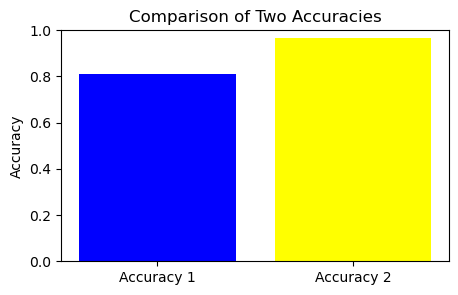

In [29]:
import matplotlib.pyplot as plt


# Define the labels
labels = ['Accuracy 1', 'Accuracy 2']
accuracies = [accuracy1, accuracy2]

# Plot the bar graph
plt.figure(figsize=(5, 3))
plt.bar(labels, accuracies, color=['blue', 'yellow'])
plt.ylim(0, 1)  # Set y-axis limit
plt.ylabel('Accuracy')
plt.title('Comparison of Two Accuracies')
plt.show()
